In [1]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from macrosim.SeriesAccessor import SeriesAccessor
import datetime as dt

Detected IPython. Loading juliacall extension. See https://juliapy.github.io/PythonCall.jl/stable/compat/#IPython


In [2]:
with open('out.pkl', 'rb') as f:
    df = pickle.load(f)

for col in df.columns[:-1]:
    df[col] = df[col].apply(lambda x: x[0])
df

,LABPART,CPI,M2,output
0,76.712287,181.146282,6050.353667,15098.394079
1,76.387786,182.471263,6104.481667,15144.884705
2,76.240608,183.077953,6179.023333,15179.596844
3,76.246600,184.387704,6261.319333,15261.943160
4,76.040573,185.586106,6318.015333,15308.508427
5,76.800864,184.784389,6410.406000,15375.575497
6,76.323806,185.779928,6488.260000,15385.426091
7,76.178690,186.302513,6562.201000,15407.966013
8,76.299487,187.761346,6651.668333,15505.197449
9,75.956933,188.738094,6738.595333,15526.766656


In [3]:
fred = SeriesAccessor(
    key_path='../fred_key.env',
    key_name='FRED_KEY',
)
start = dt.datetime.fromisoformat('2002-01-01')
end = dt.datetime.fromisoformat('2024-12-31')

act = fred.get_series(
    series_ids=['GDPC1'],
    series_alias=['RGDP'],
    date_range=(start, end)
)

act.reset_index(inplace=True, drop=True)

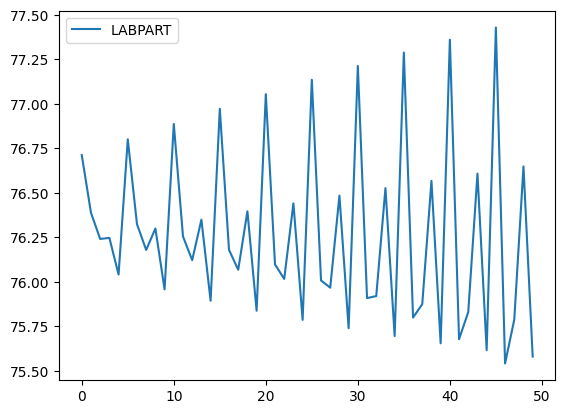

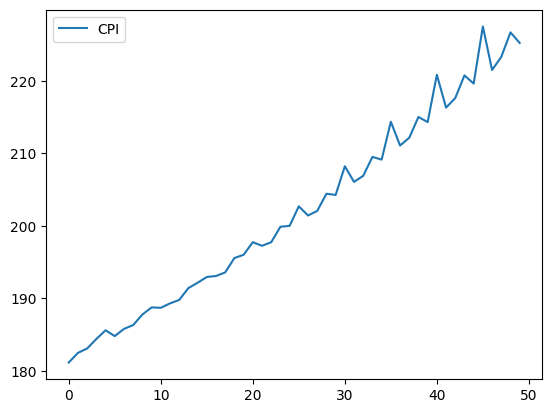

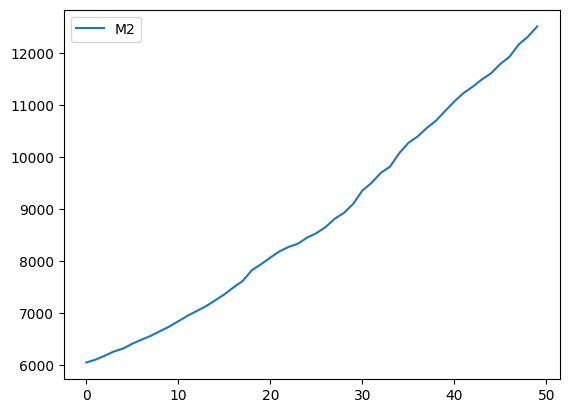

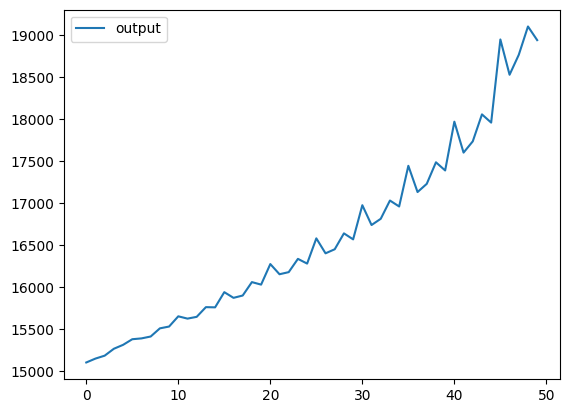

<Figure size 640x480 with 0 Axes>

In [4]:
for col in df.columns:
    plt.plot(df[col], label=col)
    plt.legend()
    plt.show()
plt.clf()

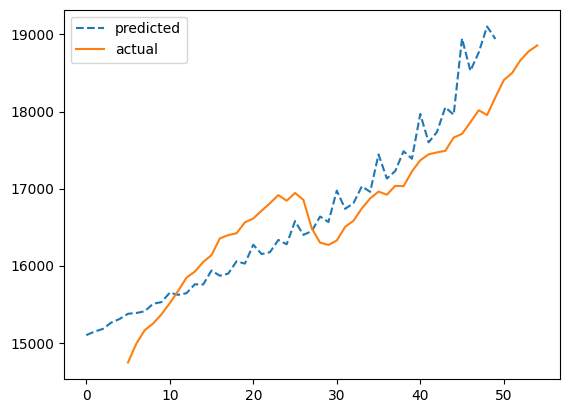

In [5]:
pred = df['output']

plt.plot(pred, label='predicted', linestyle='--')
plt.plot(act.iloc[5:55], label='actual')
plt.legend()

In [7]:
from sklearn.metrics import r2_score
r2_score(pred, act.iloc[5:55])

0.8508424690680205